In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

In [2]:
pd.set_option('display.max_columns',100)

# Data Exploration

In [3]:
# Load in the dataframe from project part 1 as basics:
df = pd.read_csv('Data/combined_tmdb_data.csv.gz')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",1.619,/uneDCn8y6RHKc5IAfpgznmaan9I.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.90,8.0,\r
1,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,"A sleepwalking, sexaholic masseur wakes up, co...",3.755,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.50,31.0,PG-13\r
2,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.622,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.00,1.0,\r
3,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",1.576,/2j90os0c2HJuIjWXxMg9vMvOliw.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.00,5.0,\r
4,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,108.562,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.59,10223.0,PG\r


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38136 entries, 0 to 38135
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                38136 non-null  object 
 1   adult                  38136 non-null  float64
 2   backdrop_path          25276 non-null  object 
 3   belongs_to_collection  2499 non-null   object 
 4   budget                 38136 non-null  float64
 5   genres                 38136 non-null  object 
 6   homepage               10063 non-null  object 
 7   id                     38136 non-null  float64
 8   original_language      38136 non-null  object 
 9   original_title         38136 non-null  object 
 10  overview               37308 non-null  object 
 11  popularity             38136 non-null  float64
 12  poster_path            35390 non-null  object 
 13  production_companies   38136 non-null  object 
 14  production_countries   38136 non-null  object 
 15  re

# Preprocessing

In [5]:
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification\r
0,tt0312305,0.0,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.900,8.0,\r
1,tt0326965,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,2010-04-23,0.0,90.0,In My Sleep,5.500,31.0,PG-13\r
2,tt0331312,0.0,NaN,0.0,[],0.622,2010-01-01,0.0,0.0,This Wretched Life,5.000,1.0,\r
3,tt0393049,0.0,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1.576,2010-05-20,0.0,98.0,Anderson's Cross,4.000,5.0,\r
4,tt0398286,0.0,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,2010-11-24,592461732.0,100.0,Tangled,7.590,10223.0,PG\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38131,tt9906644,0.0,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1.448,2019-09-27,0.0,122.0,Manoharam,6.125,12.0,\r
38132,tt9913660,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",0.638,2019-10-23,0.0,102.0,No Apology,8.000,1.0,\r
38133,tt9913872,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2019-01-01,0.0,0.0,De la piel del Diablo,8.200,3.0,\r
38134,tt9914942,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",5.570,2019-07-12,0.0,74.0,Life without Sara Amat,7.700,7.0,\r


belongs_to_collection feature

In [6]:
df['belongs_to_collection'].value_counts()

{'id': 39199, 'name': 'Detective Conan Collection', 'poster_path': '/bV6EHK0Q65hHKSoVDeACbc960jQ.jpg', 'backdrop_path': '/mwz7lYimh8da0zZHOI41xNd86yH.jpg'}    9
{'id': 148065, 'name': 'Doraemon Collection', 'poster_path': '/4TLSP1KD1uAlp2q1rTrc6SFlktX.jpg', 'backdrop_path': '/rc6OFcSasL5YxBRPUQVwxmVF6h5.jpg'}          8
{'id': 803526, 'name': 'Super Sentai Collection', 'poster_path': '/jIbtHH6ZGq4KNpiWRUajNIuiIxn.jpg', 'backdrop_path': None}                                    7
{'id': 101646, 'name': 'Vares Collection', 'poster_path': None, 'backdrop_path': None}                                                                         7
{'id': 725456, 'name': 'American Poltergeist', 'poster_path': '/blYngKjIj7FqxovoDbXwtbmJ8WF.jpg', 'backdrop_path': None}                                       7
                                                                                                                                                              ..
{'id': 448758, 'name': 'Børning Co

In [7]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].notna().sum()

2499

In [8]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    35637
True      2499
Name: belongs_to_collection, dtype: int64

genres

In [9]:
df['genres'][0]

"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id': 878, 'name': 'Science Fiction'}]"

In [10]:
## Function to get just the genre names as a list 
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [11]:
## Use our function and exploding the new column
get_genre_name(df.loc[0,'genres'])

# use get_genre_name and convert all the genere name in list

['Family', 'Animation', 'Science Fiction']

In [12]:
## Use our function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification\r,genres_list
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.9,8.0,\r,Family
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.9,8.0,\r,Animation
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.9,8.0,\r,Science Fiction
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13\r,Thriller
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13\r,Mystery


In [13]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Family', 'Animation', 'Science Fiction', 'Thriller', 'Mystery',
       'Drama', 'Romance', 'Comedy', 'War', 'Crime', 'Action',
       'Adventure', 'Horror', 'Fantasy', 'History', 'Western', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [14]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification\r,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.90,8.0,\r,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,2010-04-23,0.0,90.0,In My Sleep,5.50,31.0,PG-13\r,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0331312,0.0,False,0.0,[],0.622,2010-01-01,0.0,0.0,This Wretched Life,5.00,1.0,\r,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0393049,0.0,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1.576,2010-05-20,0.0,98.0,Anderson's Cross,4.00,5.0,\r,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,2010-11-24,592461732.0,100.0,Tangled,7.59,10223.0,PG\r,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
## Drop original genre cols
#df = df.drop(columns=['genres','genres_list'])
#df

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38136 entries, 0 to 38135
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                38136 non-null  object 
 1   adult                  38136 non-null  float64
 2   belongs_to_collection  38136 non-null  bool   
 3   budget                 38136 non-null  float64
 4   genres                 38136 non-null  object 
 5   popularity             38136 non-null  float64
 6   release_date           37602 non-null  object 
 7   revenue                38136 non-null  float64
 8   runtime                38136 non-null  float64
 9   title                  38136 non-null  object 
 10  vote_average           38136 non-null  float64
 11  vote_count             38136 non-null  float64
         38136 non-null  object 
 13  genres_list            38136 non-null  object 
 14  Genre_Family           38136 non-null  bool   
 15  Genre_Animation      

certification

In [17]:
## Checking Certification values counts
#df['certification'].value_counts(dropna=False)

In [18]:
df.rename(columns = {'certification\r':'certification'}, inplace=True)

In [19]:
df['certification'].value_counts()

\r           29768
R\r           3119
NR\r          2314
PG-13\r       1759
PG\r           799
G\r            271
NC-17\r        100
Unrated\r        4
PG-13 \r         1
10\r             1
Name: certification, dtype: int64

In [20]:
df['certification'] = df['certification'].str.replace('\r','')

In [21]:
df['certification'].value_counts()

           29768
R           3119
NR          2314
PG-13       1759
PG           799
G            271
NC-17        100
Unrated        4
PG-13          1
10             1
Name: certification, dtype: int64

In [22]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()

In [23]:
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '':np.nan,
             '10':np.nan,}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      29769
R         3119
NR        2318
PG-13     1760
PG         799
G          271
NC-17      100
Name: certification, dtype: int64

In [24]:
## split release date into 3 columns
df['release_date'].value_counts()

2010-01-01    229
2011-01-01    193
2012-01-01    174
2014-01-01    165
2013-01-01    148
             ... 
2020-12-06      1
2020-11-25      1
2016-05-24      1
2016-08-07      1
2021-01-08      1
Name: release_date, Length: 3962, dtype: int64

In [25]:
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.900,8.0,NaN,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,2010-04-23,0.0,90.0,In My Sleep,5.500,31.0,PG-13,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0
2,tt0331312,0.0,False,0.0,[],0.622,2010-01-01,0.0,0.0,This Wretched Life,5.000,1.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,1.0,1.0
3,tt0393049,0.0,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1.576,2010-05-20,0.0,98.0,Anderson's Cross,4.000,5.0,NaN,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,2010-11-24,592461732.0,100.0,Tangled,7.590,10223.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38131,tt9906644,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1.448,2019-09-27,0.0,122.0,Manoharam,6.125,12.0,NaN,"[Comedy, Drama]",False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,2019.0,9.0,27.0
38132,tt9913660,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",0.638,2019-10-23,0.0,102.0,No Apology,8.000,1.0,NaN,[Drama],False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2019.0,10.0,23.0
38133,tt9913872,0.0,False,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2019-01-01,0.0,0.0,De la piel del Diablo,8.200,3.0,NaN,[Horror],False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2019.0,1.0,1.0
38134,tt9914942,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",5.570,2019-07-12,0.0,74.0,Life without Sara Amat,7.700,7.0,NaN,"[Drama, Romance]",False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2019.0,7.0,12.0


In [26]:
## drop original feature
df = df.drop(columns=['release_date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38136 entries, 0 to 38135
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                38136 non-null  object 
 1   adult                  38136 non-null  float64
 2   belongs_to_collection  38136 non-null  bool   
 3   budget                 38136 non-null  float64
 4   genres                 38136 non-null  object 
 5   popularity             38136 non-null  float64
 6   revenue                38136 non-null  float64
 7   runtime                38136 non-null  float64
 8   title                  38136 non-null  object 
 9   vote_average           38136 non-null  float64
 10  vote_count             38136 non-null  float64
 11  certification          8367 non-null   object 
 12  genres_list            38136 non-null  object 
 13  Genre_Family           38136 non-null  bool   
 14  Genre_Animation        38136 non-null  bool   
 15  Ge

# Hypothesis Testing

# Q1: Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?
 - Null Hypothesis:There is no difference in how much revenue a movie generates between movies with different MPAA ratings. 
 - Alternative Hypothesis: There is a significant difference on how much revenue a movie makes based on their MPAA ratings. 

In [28]:
df['certification'].value_counts(dropna=False)

NaN      29769
R         3119
NR        2318
PG-13     1760
PG         799
G          271
NC-17      100
Name: certification, dtype: int64

In [29]:
# Create dataframe for testing
df_ratings = df.copy()

In [30]:
df_ratings[['certification']] = df_ratings[['certification']].fillna("NaN")

In [31]:
df_ratings['certification'].value_counts()

NaN      29769
R         3119
NR        2318
PG-13     1760
PG         799
G          271
NC-17      100
Name: certification, dtype: int64

In [32]:
df_ratings['revenue'].describe()

count    3.813600e+04
mean     7.719369e+06
std      6.311648e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.794732e+09
Name: revenue, dtype: float64

In [33]:
rating_groups = {}

for i in df_ratings['certification'].unique():
    data = df_ratings.loc[df_ratings['certification']==i, 'revenue'].copy()
    rating_groups[i] = data

rating_groups.keys()

dict_keys(['NaN', 'PG-13', 'PG', 'R', 'NR', 'G', 'NC-17'])

Testing Normality Assumption

In [34]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in rating_groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
NaN,29769.0,0.000000e+00,91813.036321
PG-13,1760.0,0.000000e+00,1783.569449
PG,799.0,3.645016e-146,669.768125
R,3119.0,0.000000e+00,3940.827672
NR,2318.0,0.000000e+00,5127.159468
G,271.0,1.866084e-81,371.771101
NC-17,100.0,1.376587e-35,160.541742


In [35]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
NaN,29769.0,0.000000e+00,91813.036321,True
PG-13,1760.0,0.000000e+00,1783.569449,True
PG,799.0,3.645016e-146,669.768125,True
R,3119.0,0.000000e+00,3940.827672,True
NR,2318.0,0.000000e+00,5127.159468,True
G,271.0,1.866084e-81,371.771101,True
NC-17,100.0,1.376587e-35,160.541742,True


* We can confirm that each rating has a normal distribution. 

Testing Equal Variance Assumption

In [36]:
# with the * operator 
stats.levene(*rating_groups.values())

LeveneResult(statistic=681.6460749590285, pvalue=0.0)

* pvalue is < 0.05, the groups do not have equal variances, we need to use "stats.kruskal"

In [37]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal( *rating_groups.values())
result

KruskalResult(statistic=7382.10069556, pvalue=0.0)

* pvalue is less than 0.05, we will reject our null hypothesis. 

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df_ratings['revenue']
labels = df_ratings['certification']

In [39]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-24451726.0513,0.009,-45146073.8532,-3757378.2493,True
G,NR,-23134835.4382,0.0,-34489494.498,-11780176.3783,True
G,NaN,-23850203.1054,0.0,-34642965.8502,-13057440.3606,True
G,PG,53003770.9088,0.0,40570560.3603,65436981.4573,True
G,PG-13,54103064.5265,0.0,42561533.6749,65644595.3782,True
G,R,-6633615.8592,0.5847,-17834619.8186,4567388.1002,False
NC-17,NR,1316890.6131,1.0,-16747398.1478,19381179.374,False
NC-17,NaN,601522.9459,1.0,-17114965.8071,18318011.6989,False
NC-17,PG,77455496.9601,0.0,58694500.968,96216492.9521,True
NC-17,PG-13,78554790.5778,0.0,60372459.0313,96737122.1244,True


Text(0.5, 1.0, 'Revenue by MPAA Rating')

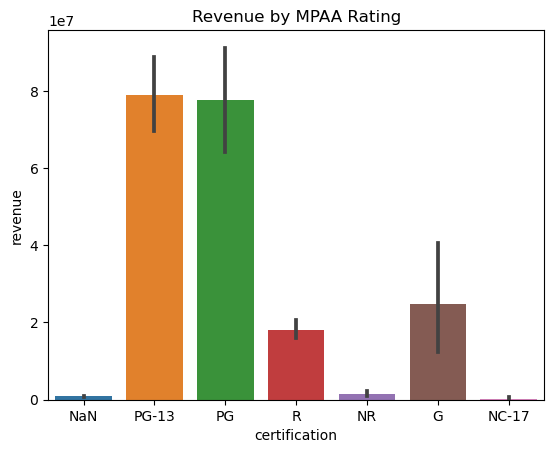

In [40]:
ax = sns.barplot(data=df_ratings, x='certification',y='revenue')
ax.set_title('Revenue by MPAA Rating')

# Conclusion
 - From our pvalue in our Kruskal test, we see that it is less than our alpha (0.05), we can therefore reject our null hypothesis. From our visual above and the table above, we can see that there are significant differences in revenue between our ratings. We see that PG-13 and PG movies make amoung the most in revenue. The table also shows that amoung the rating, there are mostly differences between the ratings in terms of revenue generated. 

# Q2: Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?
 - Null Hypothesis: There is no difference in revenue between movies that are over 2.5 hours and movies that are 1.5 hour or less. 
 - Alternative Hypothesis: Movies that are over 2.5 hours long make significantly more revenue than movies that are 1.5 hours or less.

In [41]:
hours_df = df.copy()
hours_df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.90,8.0,NaN,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,0.0,90.0,In My Sleep,5.50,31.0,PG-13,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0
2,tt0331312,0.0,False,0.0,[],0.622,0.0,0.0,This Wretched Life,5.00,1.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,1.0,1.0
3,tt0393049,0.0,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1.576,0.0,98.0,Anderson's Cross,4.00,5.0,NaN,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,592461732.0,100.0,Tangled,7.59,10223.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0


In [42]:
hours_df['runtime'].isna().sum()

0

In [43]:
hours_df['runtime'].describe()

count    38136.000000
mean        91.924481
std         31.486210
min          0.000000
25%         84.000000
50%         93.000000
75%        105.000000
max       1440.000000
Name: runtime, dtype: float64

In [44]:
# Removing moview that are 0 minutes
hours_df.drop(hours_df[hours_df['runtime'] == 0.0].index, inplace = True)

In [45]:
hours_df['runtime'].describe()

count    36030.000000
mean        97.297585
std         22.946153
min          1.000000
25%         85.000000
50%         94.000000
75%        106.000000
max       1440.000000
Name: runtime, dtype: float64

In [46]:
hours_df['runtime'].value_counts()

90.0     2530
100.0    1232
95.0     1138
85.0     1105
80.0     1052
         ... 
196.0       1
338.0       1
310.0       1
231.0       1
212.0       1
Name: runtime, Length: 211, dtype: int64

In [47]:
hours_df['hours'] = hours_df[['runtime']].apply(lambda x: 'more than 2.5' if (x.runtime > 170) 
                                              else 'more than 1.5, less than 2.5' if (x.runtime > 90)
                                              else '1.5 hours or less', axis =1)

In [48]:
hours_df['hours'].value_counts()

more than 1.5, less than 2.5    21002
1.5 hours or less               14842
more than 2.5                     186
Name: hours, dtype: int64

In [49]:
hours_df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day,hours
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.90,8.0,NaN,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0,1.5 hours or less
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,0.0,90.0,In My Sleep,5.50,31.0,PG-13,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0,1.5 hours or less
3,tt0393049,0.0,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1.576,0.0,98.0,Anderson's Cross,4.00,5.0,NaN,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0,"more than 1.5, less than 2.5"
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,592461732.0,100.0,Tangled,7.59,10223.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0,"more than 1.5, less than 2.5"
5,tt0403645,0.0,True,55000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",4.361,0.0,180.0,Burnt by the Sun 2: Exodus,5.20,40.0,NaN,"[Drama, War]",False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,22.0,more than 2.5


In [50]:
#longer_hours = hours_df.loc[hours_df['runtime'] > 170, "revenue"].copy()
longer_hours = hours_df.loc[hours_df['hours'] == 'more than 2.5', 'revenue'].copy()
longer_hours.head()

5              0.0
777            0.0
1127    20000000.0
1722           0.0
1786           0.0
Name: revenue, dtype: float64

In [51]:
longer_hours.info()

<class 'pandas.core.series.Series'>
Int64Index: 186 entries, 5 to 37853
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
186 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [52]:
#shorter_hours = hours_df.loc[((hours_df['runtime'] < 170) & (hours_df['runtime'] <= 90)), "revenue"].copy(\
shorter_hours = hours_df.loc[hours_df['hours'] == '1.5 hours or less', 'revenue'].copy()
shorter_hours.head()

0            0.0
1            0.0
16           0.0
22    83188165.0
23           0.0
Name: revenue, dtype: float64

In [53]:
shorter_hours.info()

<class 'pandas.core.series.Series'>
Int64Index: 14842 entries, 0 to 38134
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
14842 non-null  float64
dtypes: float64(1)
memory usage: 231.9 KB


Outliers

In [54]:
zscore_longer = stats.zscore(longer_hours)
outliers_longer = abs(zscore_longer) > 3
np.sum(outliers_longer)

1

In [55]:
zscore_shorter = stats.zscore(shorter_hours)
outliers_shorter = abs(zscore_shorter) > 3
np.sum(outliers_shorter)

81

In [56]:
longer_hours = longer_hours[(np.abs(stats.zscore(longer_hours)) < 3)]

In [57]:
len(longer_hours)

185

In [58]:
shorter_hours = shorter_hours[(np.abs(stats.zscore(shorter_hours)) < 3)]

In [59]:
len(shorter_hours)

14761

Normality Test

In [60]:
norm_longer = stats.normaltest(longer_hours)
norm_longer

NormaltestResult(statistic=296.47248035916067, pvalue=4.186189383146892e-65)

In [61]:
norm_shorter = stats.normaltest(shorter_hours)
norm_shorter

NormaltestResult(statistic=28060.11183069998, pvalue=0.0)

* Both of the pvalues for the normality test are below the 0.05, they are not normaly distributed. We can still move on since the sample sizes are large enough. They are above the 15 per group mark. 

Equal Variance Test

In [62]:
variance_result = stats.levene(longer_hours, shorter_hours)
variance_result

LeveneResult(statistic=427.33517818549683, pvalue=1.2560588610238658e-93)

* Our pvalue is not more than 0.05. We do not have equal variance, therefore we will use "equal_var = False" for our t-test. 

In [63]:
ttest_result = stats.ttest_ind(longer_hours, shorter_hours, equal_var = False)
ttest_result

Ttest_indResult(statistic=2.6088573082616078, pvalue=0.009831315354606827)

* Our pvalue < alpha (0.05), so we reject the null hypothesis. 

* For visualization, we will drop movies that are less than 2.5 hours but more than 1.5 hours.

In [64]:
hours_df.drop(hours_df[hours_df['hours'] == 'more than 1.5, less than 2.5'].index, inplace = True)
hours_df['hours'].value_counts()

1.5 hours or less    14842
more than 2.5          186
Name: hours, dtype: int64

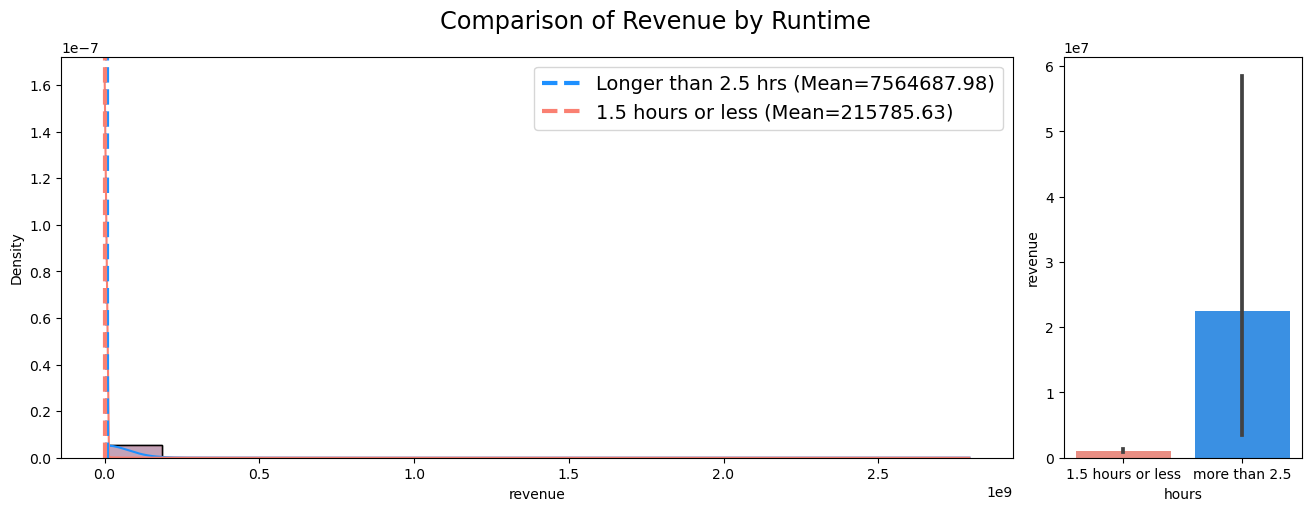

In [65]:
hours_palette={'more than 2.5':'dodgerblue', '1.5 hours or less':'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (13,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=hours_df, x='revenue',fill=True,hue='hours',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=hours_palette)

ax.axvline(np.mean(longer_hours), ls='--',lw=3, 
           label=f"Longer than 2.5 hrs (Mean={np.mean(longer_hours):.2f})",color=hours_palette['more than 2.5'])

ax.axvline(np.mean(shorter_hours), ls='--', lw=3, 
           label=f"1.5 hours or less (Mean={np.mean(shorter_hours):.2f})",color=hours_palette['1.5 hours or less'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=hours_df, x='hours',y='revenue',ax = ax_bar,palette=hours_palette)
fig.suptitle('Comparison of Revenue by Runtime',fontsize='xx-large');

* From the visual above, the right figure clearly shows that movies that are more than 2.5 hrs long have higher revenue as compared with movies that are 90 minutes or less. The left figure is less interpretable, since the distribution is off for both groups.

# Conclusion
 - From the pvalue from the ttest, we see that it is less than our alpha (0.05). We therefore reject our null hypothesis. In conjuction with the visual above, we can clearly see than movies that are longer than 2.5 hours generally have a higher revenue. 

# Q3: Do movies that are exclusively in the drama genre make more in revenue than movies that are not exclusively in the drama genre?
 - Null Hypothesis: There is no difference in revenue between movies that are exclusively in the drama genre and movies that are not exclusively in the drama genre.    
 - Alternative Hypothesis: There is a significant difference in revenue between movies that are exclusively in the drama genre and movies that are not exclusively in the drama genre. 

In [66]:
genres_df = df.copy()
genres_df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.90,8.0,NaN,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,0.0,90.0,In My Sleep,5.50,31.0,PG-13,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0
2,tt0331312,0.0,False,0.0,[],0.622,0.0,0.0,This Wretched Life,5.00,1.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,1.0,1.0
3,tt0393049,0.0,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1.576,0.0,98.0,Anderson's Cross,4.00,5.0,NaN,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,592461732.0,100.0,Tangled,7.59,10223.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0


In [67]:
unique_genres

array(['Family', 'Animation', 'Science Fiction', 'Thriller', 'Mystery',
       'Drama', 'Romance', 'Comedy', 'War', 'Crime', 'Action',
       'Adventure', 'Horror', 'Fantasy', 'History', 'Western', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [68]:
## Use our function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df['genres_list'].head()

0    [Family, Animation, Science Fiction]
1              [Thriller, Mystery, Drama]
2                                      []
3                [Romance, Comedy, Drama]
4                     [Animation, Family]
Name: genres_list, dtype: object

In [69]:
df['genres_list'].value_counts()

[Drama]                                                                 6838
[]                                                                      3415
[Comedy]                                                                2613
[Horror]                                                                1935
[Comedy, Drama]                                                         1182
                                                                        ... 
[Science Fiction, Drama, War, Romance]                                     1
[Comedy, Action, Adventure, Fantasy, Science Fiction, Horror, Music]       1
[Mystery, Comedy, Drama, History]                                          1
[Drama, Family, TV Movie]                                                  1
[Animation, Crime, Action]                                                 1
Name: genres_list, Length: 2900, dtype: int64

In [70]:
df['genres_list'] = df.genres_list.apply(lambda x: sorted(map(str, x)))

In [71]:
df['genres_list'].value_counts()

[Drama]                                                         6838
[]                                                              3415
[Comedy]                                                        2613
[Horror]                                                        1935
[Comedy, Drama]                                                 1921
                                                                ... 
[Adventure, Crime, Documentary]                                    1
[War, Western]                                                     1
[Action, Adventure, Animation, Documentary, Family, History]       1
[History, Mystery]                                                 1
[Action, Family, Science Fiction]                                  1
Name: genres_list, Length: 1275, dtype: int64

In [72]:
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.90,8.0,NaN,"[Animation, Family, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,0.0,90.0,In My Sleep,5.50,31.0,PG-13,"[Drama, Mystery, Thriller]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0
2,tt0331312,0.0,False,0.0,[],0.622,0.0,0.0,This Wretched Life,5.00,1.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,1.0,1.0
3,tt0393049,0.0,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1.576,0.0,98.0,Anderson's Cross,4.00,5.0,NaN,"[Comedy, Drama, Romance]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,592461732.0,100.0,Tangled,7.59,10223.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0


In [73]:
genres_df['genres_list'] = [','.join(map(str, l)) for l in df['genres_list']]

In [74]:
genres_df['genres_list'].head()

0    Animation,Family,Science Fiction
1              Drama,Mystery,Thriller
2                                    
3                Comedy,Drama,Romance
4                    Animation,Family
Name: genres_list, dtype: object

In [75]:
genres_df.dropna(subset=['genres_list'], inplace = True)

In [76]:
genres_df['genres_list'].isna().sum()

0

In [77]:
genres_df['genres_list'].value_counts()

Drama                                                    6838
                                                         3415
Comedy                                                   2613
Horror                                                   1935
Comedy,Drama                                             1921
                                                         ... 
Adventure,Crime,Documentary                                 1
War,Western                                                 1
Action,Adventure,Animation,Documentary,Family,History       1
History,Mystery                                             1
Action,Family,Science Fiction                               1
Name: genres_list, Length: 1275, dtype: int64

In [78]:
genres_df['genres_list'].replace('', np.nan, inplace=True)

In [79]:
genres_df['genres_list'].value_counts()

Drama                                    6838
Comedy                                   2613
Horror                                   1935
Comedy,Drama                             1921
Drama,Romance                            1327
                                         ... 
Action,Crime,Drama,War                      1
Action,Comedy,Drama,Fantasy,Mystery         1
Comedy,Drama,Mystery,Romance,Thriller       1
Horror,Mystery,Thriller,Western             1
Action,Family,Science Fiction               1
Name: genres_list, Length: 1274, dtype: int64

In [80]:
genres_df['genres_list'].isna().sum()

3415

In [81]:
genres_df.dropna(subset=['genres_list'], inplace = True)

In [82]:
genres_df['genres_list'].isna().sum()

0

In [83]:
genres_df['genres_list'] = genres_df['genres_list'].apply(lambda x: "drama" if x == 'Drama' else "no drama")

In [84]:
genres_df['genres_list'].value_counts()

no drama    27883
drama        6838
Name: genres_list, dtype: int64

In [85]:
#longer_hours = hours_df.loc[hours_df['runtime'] > 170, "revenue"].copy()
drama = genres_df.loc[genres_df['genres_list'] == 'drama', 'revenue'].copy()
drama.head()

19    0.0
25    0.0
28    0.0
32    0.0
40    0.0
Name: revenue, dtype: float64

In [86]:
no_drama = genres_df.loc[genres_df['genres_list'] == 'no drama', 'revenue'].copy()
no_drama.head()

0            0.0
1            0.0
3            0.0
4    592461732.0
5            0.0
Name: revenue, dtype: float64

In [87]:
drama.describe()

count    6.838000e+03
mean     8.591507e+05
std      9.891298e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.328447e+08
Name: revenue, dtype: float64

In [88]:
no_drama.describe()

count    2.788300e+04
mean     1.034650e+07
std      7.347706e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.794732e+09
Name: revenue, dtype: float64

In [89]:
print(len(drama))
print(len(no_drama))

6838
27883


Outlier assumptions

In [90]:
zscore_drama = stats.zscore(drama)
outliers_drama = abs(zscore_drama) > 3
np.sum(outliers_drama)

48

In [91]:
zscore_no_drama = stats.zscore(no_drama)
outliers_no_drama = abs(zscore_no_drama) > 3
np.sum(outliers_no_drama)

339

In [92]:
drama = drama[(np.abs(stats.zscore(drama)) < 3)]
len(drama)

6790

In [93]:
no_drama = no_drama[(np.abs(stats.zscore(no_drama)) < 3)]
len(no_drama)

27544

Normality Test

In [94]:
norm_drama = stats.normaltest(drama)
norm_drama

NormaltestResult(statistic=11334.654676908727, pvalue=0.0)

In [95]:
norm_no_drama = stats.normaltest(no_drama)
norm_no_drama

NormaltestResult(statistic=34772.09193577609, pvalue=0.0)

* Both of the pvalues for the normality test are below the 0.05, they are not normaly distributed. We can still move on since the sample sizes are large enough. They are above the 15 per group mark.

Equal Variance Test

In [96]:
variance_result = stats.levene(drama, no_drama)
variance_result

LeveneResult(statistic=216.85530145906233, pvalue=6.191616790137019e-49)

* Our pvalue is not more than 0.05. We do not have equal variance, therefore we will use "equal_var = False" for our t-test.

T-Test

In [97]:
ttest_result = stats.ttest_ind(drama, no_drama, equal_var = False)
ttest_result

Ttest_indResult(statistic=-29.224099611122906, pvalue=4.434057028398515e-185)

* The pvalue for the ttest is less than alpha (0.05), therefore we reject the null hypothesis. 

* Our pvalue < alpha (0.05), so we reject the null hypothesis.

# Making genres_list values 'yes' and 'no' values only for if it is exclusively a drama genre or not. This will make making our visuals easier.

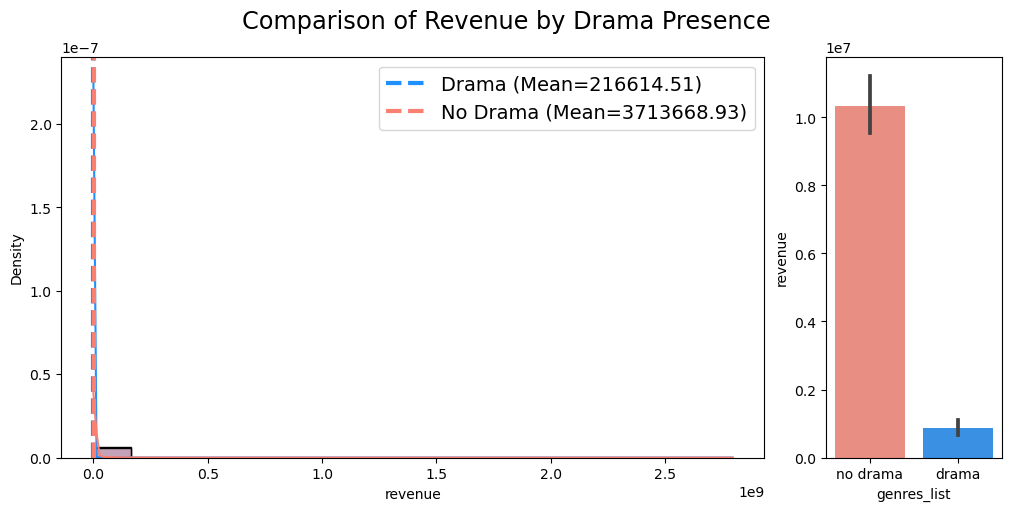

In [98]:
drama_palette={'drama':'dodgerblue', 'no drama':'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=genres_df, x='revenue',fill=True,hue='genres_list',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=drama_palette)

ax.axvline(np.mean(drama), ls='--',lw=3, 
           label=f"Drama (Mean={np.mean(drama):.2f})",color=drama_palette['drama'])

ax.axvline(np.mean(no_drama), ls='--', lw=3, 
           label=f"No Drama (Mean={np.mean(no_drama):.2f})",color=drama_palette['no drama'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=genres_df, x='genres_list',y='revenue',ax = ax_bar,palette=drama_palette)
fig.suptitle('Comparison of Revenue by Drama Presence',fontsize='xx-large');

* From the visual above, the right figure clearly shows that movies are not exclusively dramatic have higher revenue as compared with movies that are exclusively dramatic. The left figure is less interpretable, since the distribution is off for both groups.

# Conclusion
 - From the pvalue from the ttest, we see that it is less than our alpha (0.05). We therefore reject our null hypothesis. In conjuction with the visual above, we can clearly see than movies that are not exclusively dramatic generally have a higher revenue. 